# Optimization Methods

直到现在，你已经使用了梯度下降算法来更新参数并最小化cost。在本次实验中，你将会学到使用更多的高级的方法来加速学习或者得到更好的训练结果。一个好的优化算法能够让你将训练时间从几天缩短到几个小时！

梯度下降算法可以描述为一个人从山顶往山脚下走，如下图所示: 

<img src="images/cost.jpg" style="width:650px;height:300px;">
<caption><center> <u> **图 1** </u>: **最小化cost的工作类似于找到山地中的最低点**<br> 训练过程中的每次迭代相当于往山地最低点的方向迈了一步. </center></caption>

**注意**: 还是一样, 使用 `da` 表示 $\frac{\partial J}{\partial a }  $.

引入一些需要用到的库文件：

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import math
import sklearn
import sklearn.datasets

from opt_utils import load_params_and_grads, initialize_parameters, forward_propagation, backward_propagation
from opt_utils import compute_cost, predict, predict_dec, plot_decision_boundary, load_dataset
from testCases import *

%matplotlib inline
plt.rcParams['figure.figsize'] = (7.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

/Users/starwe/Desktop/百度工作/DeepLearningAndPaddleTutorial/jupyter/10.optimization/numpy_optimization/Optimization/opt_utils.py:76: SyntaxWarning: assertion is always true, perhaps remove parentheses?
  assert(parameters['W' + str(l)].shape == layer_dims[l], layer_dims[l-1])
/Users/starwe/Desktop/百度工作/DeepLearningAndPaddleTutorial/jupyter/10.optimization/numpy_optimization/Optimization/opt_utils.py:77: SyntaxWarning: assertion is always true, perhaps remove parentheses?
  assert(parameters['W' + str(l)].shape == layer_dims[l], 1)


## 1 - Gradient Descent

一个简单的机器学习优化方法就是梯度下降gradient descent (GD). 当你在每一步都对所有的$m$ 个样例使用梯度下降，那么这样的梯度下降方法叫做Batch Gradient Descent. 

**热身练习**: 实现梯度下降更新规则，对于 $l = 1, ..., L$: 
$$ W^{[l]} = W^{[l]} - \alpha \text{ } dW^{[l]} \tag{1}$$
$$ b^{[l]} = b^{[l]} - \alpha \text{ } db^{[l]} \tag{2}$$

L 表示第几层、 $\alpha$ 表示学习率. 所有参数都储存在 `parameters` 字典中国年. 注意到第一次迭代 `l` 在 `for` 循环中应该为0， 而第一个参数是 $W^{[1]}$ and $b^{[1]}$。所以我们需要将`l` 表示为 `l+1` 。

In [2]:
# GRADED FUNCTION: update_parameters_with_gd

def update_parameters_with_gd(parameters, grads, learning_rate):
    """
    Update parameters using one step of gradient descent
    
    Arguments:
    parameters -- python dictionary containing your parameters to be updated:
                    parameters['W' + str(l)] = Wl
                    parameters['b' + str(l)] = bl
    grads -- python dictionary containing your gradients to update each parameters:
                    grads['dW' + str(l)] = dWl
                    grads['db' + str(l)] = dbl
    learning_rate -- the learning rate, scalar.
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
    """

    L = len(parameters) // 2 # number of layers in the neural networks

    # Update rule for each parameter
    for l in range(L):
        ### START CODE HERE ### (approx. 2 lines)
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate * grads["dW" + str(l+1)]
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate * grads["db" + str(l+1)]
        ### END CODE HERE ###
        
    return parameters

In [3]:
parameters, grads, learning_rate = update_parameters_with_gd_test_case()

parameters = update_parameters_with_gd(parameters, grads, learning_rate)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[ 1.63535156 -0.62320365 -0.53718766]
 [-1.07799357  0.85639907 -2.29470142]]
b1 = [[ 1.74604067]
 [-0.75184921]]
W2 = [[ 0.32171798 -0.25467393  1.46902454]
 [-2.05617317 -0.31554548 -0.3756023 ]
 [ 1.1404819  -1.09976462 -0.1612551 ]]
b2 = [[-0.88020257]
 [ 0.02561572]
 [ 0.57539477]]


**期望输出**:

<table> 
    <tr>
    <td > **W1** </td> 
           <td > [[ 1.63535156 -0.62320365 -0.53718766]
 [-1.07799357  0.85639907 -2.29470142]] </td> 
    </tr> 
    
    <tr>
    <td > **b1** </td> 
           <td > [[ 1.74604067]
 [-0.75184921]] </td> 
    </tr> 
    
    <tr>
    <td > **W2** </td> 
           <td > [[ 0.32171798 -0.25467393  1.46902454]
 [-2.05617317 -0.31554548 -0.3756023 ]
 [ 1.1404819  -1.09976462 -0.1612551 ]] </td> 
    </tr> 
    
    <tr>
    <td > **b2** </td> 
           <td > [[-0.88020257]
 [ 0.02561572]
 [ 0.57539477]] </td> 
    </tr> 
</table>


随机梯度下降Stochastic Gradient Descent(SGD)与 (batch) gradient descent相似，不同之处在于随机梯度下降每次只根据单个样例进行梯度下降并更新参数，而不是使用整个训练集。下面的代码表示了两者的不同：

- **(Batch) Gradient Descent**:

``` python
X = data_input
Y = labels
parameters = initialize_parameters(layers_dims)
for i in range(0, num_iterations):
    # Forward propagation
    a, caches = forward_propagation(X, parameters)
    # Compute cost.
    cost = compute_cost(a, Y)
    # Backward propagation.
    grads = backward_propagation(a, caches, parameters)
    # Update parameters.
    parameters = update_parameters(parameters, grads)
        
```

- **Stochastic Gradient Descent**:

```python
X = data_input
Y = labels
parameters = initialize_parameters(layers_dims)
for i in range(0, num_iterations):
    for j in range(0, m):
        # Forward propagation
        a, caches = forward_propagation(X[:,j], parameters)
        # Compute cost
        cost = compute_cost(a, Y[:,j])
        # Backward propagation
        grads = backward_propagation(a, caches, parameters)
        # Update parameters.
        parameters = update_parameters(parameters, grads)
```


在随机梯度下降(Stochastic Gradient Descent)中, 我们使用单个样例来计算梯度。当训练集很大时, SGD 会很快。但是参数的收敛过程会出现震荡。如图所示: 

<img src="images/kiank_sgd.png" style="width:750px;height:250px;">
<caption><center> <u> <font color='purple'> **图 1** </u><font color='purple'>  : **SGD vs GD**<br> "+" 表示cost最小值点。 SGD 的收敛过程产生很大的震荡. 但是 SGD 的每一次迭代比 GD 要快得多, 因为它只使用了单个样例来计算 (vs. GD使用了整个训练集). </center></caption>

**注意** 实现 SGD 总共需要3个for循环:
1. 迭代次数(number of iterations)
2. 训练集样例数 $m$ (training examples)
3. 神经网络层数 (更新参数，从$(W^{[1]},b^{[1]})$ 到 $(W^{[L]},b^{[L]})$)

在实践中，如果你不使用整个训练集，也不仅仅是一个训练样例来执行每个更新，通常会得到更快的结果。小批量梯度下降(Mini-Batch GD)使用的样例数介于一个和整个训练集样例数之间。通过小批量梯度下降，可以循环使用小批量，而不是循环遍历各个训练样例。

<img src="images/kiank_minibatch.png" style="width:750px;height:250px;">
<caption><center> <u> <font color='purple'> **图 2** </u>: <font color='purple'>  **SGD vs Mini-Batch GD**<br> "+" 代表cost最小值点. 使用mini-batches往往能导致更快的收敛速度. </center></caption>

<font color='blue'>
**你应该记住：**:
- gradient descent, mini-batch gradient descent and stochastic gradient descent之间的不同在于每次迭代更新使用的样例数量不同。
- 你需要调整学习率 $\alpha$.
- 一个调整好的 mini-batch size, 通常表现的比 gradient descent 或者 stochastic gradient descent 都好(尤其是当训练集很大的时候)。

## 2 - Mini-Batch Gradient descent

让我们学习怎么从训练集(X, Y)中构建Mini-Batch。

两个步骤:
- **Shuffle**: 构建一个“乱序”的数据集 (X, Y)。没列的X 和 Y代表一个训练样例。需要注意的是“乱序”的操作对于 X 和 Y是同步的。只有这样，“乱序”后的数据集中， X 的 $i^{th}$ 个值才会对应着 Y 的 $i^{th}$ 的标签值. “乱序”操作保证所有的样例都被分配到不同的Mini-Batch中。

<img src="images/kiank_shuffle.png" style="width:550px;height:300px;">

- **分割数据**: 分割 shuffled (X, Y) 为 `mini_batch_size`（这里是64）大小的mini-batches 。需要注意的是训练样例的数量并不总是能被 `mini_batch_size` 整除。最后一个Mini-Batch会比其它Mini-Batch小,  它看起来是这样的: 

<img src="images/kiank_partition.png" style="width:550px;height:300px;">

**练习**: 实现 `random_mini_batches`。我们已经帮你实现了“乱序”的方法. 你可以通过下面的方法来分割 $1^{st}$ and $2^{nd}$ mini-batches:
```python
first_mini_batch_X = shuffled_X[:, 0 : mini_batch_size]
second_mini_batch_X = shuffled_X[:, mini_batch_size : 2 * mini_batch_size]
...
```

最后一个Mini-Batch可能小于 `mini_batch_size=64`. 用 $\lfloor s \rfloor$ 表示 $s$ 向下取整 ( `math.floor(s)` in Python). 如果样例总数不能被 `mini_batch_size=64` 整除，那么会有 $\lfloor \frac{m}{mini\_batch\_size}\rfloor$ mini-batches包含64个样例, 而最后一个mini-batch的样例数会是($m-mini_\_batch_\_size \times \lfloor \frac{m}{mini\_batch\_size}\rfloor$). 

In [4]:
# GRADED FUNCTION: random_mini_batches

def random_mini_batches(X, Y, mini_batch_size = 64, seed = 0):
    """
    Creates a list of random minibatches from (X, Y)
    
    Arguments:
    X -- input data, of shape (input size, number of examples)
    Y -- true "label" vector (1 for blue dot / 0 for red dot), of shape (1, number of examples)
    mini_batch_size -- size of the mini-batches, integer
    
    Returns:
    mini_batches -- list of synchronous (mini_batch_X, mini_batch_Y)
    """
    
    np.random.seed(seed)            # To make your "random" minibatches the same as ours
    m = X.shape[1]                  # number of training examples
    mini_batches = []
        
    # Step 1: Shuffle (X, Y)
    permutation = list(np.random.permutation(m))
    shuffled_X = X[:, permutation]
    shuffled_Y = Y[:, permutation].reshape((1,m))

    # Step 2: Partition (shuffled_X, shuffled_Y). Minus the end case.
    num_complete_minibatches = math.floor(m/mini_batch_size) # number of mini batches of size mini_batch_size in your partitionning
    for k in range(0, num_complete_minibatches):
        ### START CODE HERE ### (approx. 2 lines)
        mini_batch_X = shuffled_X[:, k * mini_batch_size : (k + 1) * mini_batch_size]
        mini_batch_Y = shuffled_Y[:, k * mini_batch_size : (k + 1) * mini_batch_size]
        ### END CODE HERE ###
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    # Handling the end case (last mini-batch < mini_batch_size)
    if m % mini_batch_size != 0:
        ### START CODE HERE ### (approx. 2 lines)
        mini_batch_X = shuffled_X[:, num_complete_minibatches * mini_batch_size : m]
        mini_batch_Y = shuffled_Y[:, num_complete_minibatches * mini_batch_size : m]
        ### END CODE HERE ###
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    return mini_batches

In [5]:
X_assess, Y_assess, mini_batch_size = random_mini_batches_test_case()
mini_batches = random_mini_batches(X_assess, Y_assess, mini_batch_size)

print ("shape of the 1st mini_batch_X: " + str(mini_batches[0][0].shape))
print ("shape of the 2nd mini_batch_X: " + str(mini_batches[1][0].shape))
print ("shape of the 3rd mini_batch_X: " + str(mini_batches[2][0].shape))
print ("shape of the 1st mini_batch_Y: " + str(mini_batches[0][1].shape))
print ("shape of the 2nd mini_batch_Y: " + str(mini_batches[1][1].shape)) 
print ("shape of the 3rd mini_batch_Y: " + str(mini_batches[2][1].shape))
print ("mini batch sanity check: " + str(mini_batches[0][0][0][0:3]))

shape of the 1st mini_batch_X: (12288, 64)
shape of the 2nd mini_batch_X: (12288, 64)
shape of the 3rd mini_batch_X: (12288, 20)
shape of the 1st mini_batch_Y: (1, 64)
shape of the 2nd mini_batch_Y: (1, 64)
shape of the 3rd mini_batch_Y: (1, 20)
mini batch sanity check: [ 0.90085595 -0.7612069   0.2344157 ]


**期望输出**:

<table style="width:50%"> 
    <tr>
    <td > **shape of the 1st mini_batch_X** </td> 
           <td > (12288, 64) </td> 
    </tr> 
    
    <tr>
    <td > **shape of the 2nd mini_batch_X** </td> 
           <td > (12288, 64) </td> 
    </tr> 
    
    <tr>
    <td > **shape of the 3rd mini_batch_X** </td> 
           <td > (12288, 20) </td> 
    </tr>
    <tr>
    <td > **shape of the 1st mini_batch_Y** </td> 
           <td > (1, 64) </td> 
    </tr> 
    <tr>
    <td > **shape of the 2nd mini_batch_Y** </td> 
           <td > (1, 64) </td> 
    </tr> 
    <tr>
    <td > **shape of the 3rd mini_batch_Y** </td> 
           <td > (1, 20) </td> 
    </tr> 
    <tr>
    <td > **mini batch sanity check** </td> 
           <td > [ 0.90085595 -0.7612069   0.2344157 ] </td> 
    </tr>
    
</table>

<font color='blue'>
**你应该记住**:
- 要构造mini-batches，我们需要实现“乱序”和分割数据两个步骤(Shuffling and Partitioning)
- 我们通常选择2的n次方作为mini-batch size, e.g., 16, 32, 64, 128.

## 3 - Momentum

Because mini-batch gradient descent makes a parameter update after seeing just a subset of examples, the direction of the update has some variance, and so the path taken by mini-batch gradient descent will "oscillate" toward convergence. Using momentum can reduce these oscillations. 

Momentum takes into account the past gradients to smooth out the update. We will store the 'direction' of the previous gradients in the variable $v$. Formally, this will be the exponentially weighted average of the gradient on previous steps. You can also think of $v$ as the "velocity" of a ball rolling downhill, building up speed (and momentum) according to the direction of the gradient/slope of the hill. 

由于小批量梯度下降在仅看到一个子集的样例之后进行参数更新，因此更新的方向有一定的变化，所以小批量梯度下降所采用的路径将会“趋于”收敛。 使用动量可以减少这些振荡。

动量利用之前步骤的梯度值来平滑更新的过程。 我们将把之前步骤的梯度“方向”存储在变量$ v $中。 形式上，这将是前面步骤中梯度的指数加权平均值。 你也可以把$ v $想象成一个下坡滚动的“速度”，根据山坡的坡度/方向建立速度（和动量）。

<img src="images/opt_momentum.png" style="width:400px;height:250px;">
<caption><center> <u><font color='purple'>**图 3**</u><font color='purple'>: 红色的箭头表示mini-batch gradient descent with momentum的一次梯度下降方向. 蓝色的虚线表示当前的Mini-Batch计算的梯度下降方向。我们用梯度值来计算$v$然后用$v$来更新参数.<br> <font color='black'> </center>


**练习**: 初始化速度(velocity)。速度 $v$, 初始化为一个值为零的python字典。他的keys与 `grads` 相同：
对于 $l =1,...,L$:
```python
v["dW" + str(l+1)] = ... #(numpy array of zeros with the same shape as parameters["W" + str(l+1)])
v["db" + str(l+1)] = ... #(numpy array of zeros with the same shape as parameters["b" + str(l+1)])
```
**注意** 到第一次迭代 `l` 在 `for` 循环中应该为0， 而第一个参数是 $W^{[1]}$ and $b^{[1]}$。所以我们需要将`l` 表示为 `l+1` 。

In [6]:
# GRADED FUNCTION: initialize_velocity

def initialize_velocity(parameters):
    """
    Initializes the velocity as a python dictionary with:
                - keys: "dW1", "db1", ..., "dWL", "dbL" 
                - values: numpy arrays of zeros of the same shape as the corresponding gradients/parameters.
    Arguments:
    parameters -- python dictionary containing your parameters.
                    parameters['W' + str(l)] = Wl
                    parameters['b' + str(l)] = bl
    
    Returns:
    v -- python dictionary containing the current velocity.
                    v['dW' + str(l)] = velocity of dWl
                    v['db' + str(l)] = velocity of dbl
    """
    
    L = len(parameters) // 2 # number of layers in the neural networks
    v = {}
    
    # Initialize velocity
    for l in range(L):
        ### START CODE HERE ### (approx. 2 lines)
        v["dW" + str(l+1)] = np.zeros(parameters['W' + str(l+1)].shape)
        v["db" + str(l+1)] = np.zeros(parameters['b' + str(l+1)].shape)
        ### END CODE HERE ###
        
    return v

In [7]:
parameters = initialize_velocity_test_case()

v = initialize_velocity(parameters)
print("v[\"dW1\"] = " + str(v["dW1"]))
print("v[\"db1\"] = " + str(v["db1"]))
print("v[\"dW2\"] = " + str(v["dW2"]))
print("v[\"db2\"] = " + str(v["db2"]))

v["dW1"] = [[ 0.  0.  0.]
 [ 0.  0.  0.]]
v["db1"] = [[ 0.]
 [ 0.]]
v["dW2"] = [[ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]
v["db2"] = [[ 0.]
 [ 0.]
 [ 0.]]


**期望输出**:

<table style="width:40%"> 
    <tr>
    <td > **v["dW1"]** </td> 
           <td > [[ 0.  0.  0.]
 [ 0.  0.  0.]] </td> 
    </tr> 
    
    <tr>
    <td > **v["db1"]** </td> 
           <td > [[ 0.]
 [ 0.]] </td> 
    </tr> 
    
    <tr>
    <td > **v["dW2"]** </td> 
           <td > [[ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]] </td> 
    </tr> 
    
    <tr>
    <td > **v["db2"]** </td> 
           <td > [[ 0.]
 [ 0.]
 [ 0.]] </td> 
    </tr> 
</table>


**练习**:  现在用momentum来实现参数更新. Momentum参数更新规则是，对于 $l = 1, ..., L$: 

$$ \begin{cases}
v_{dW^{[l]}} = \beta v_{dW^{[l]}} + (1 - \beta) dW^{[l]} \\
W^{[l]} = W^{[l]} - \alpha v_{dW^{[l]}}
\end{cases}\tag{3}$$

$$\begin{cases}
v_{db^{[l]}} = \beta v_{db^{[l]}} + (1 - \beta) db^{[l]} \\
b^{[l]} = b^{[l]} - \alpha v_{db^{[l]}} 
\end{cases}\tag{4}$$

L表示神经网络的第几层， $\beta$ 表示momentum参数，$\alpha$ 表示学习率。 所有参数都需要存储在 `parameters` 字典中. **注意** 到第一次迭代 `l` 在 `for` 循环中应该为0， 而第一个参数是 $W^{[1]}$ and $b^{[1]}$。所以我们需要将`l` 表示为 `l+1` 。

In [10]:
# GRADED FUNCTION: update_parameters_with_momentum

def update_parameters_with_momentum(parameters, grads, v, beta, learning_rate):
    """
    Update parameters using Momentum
    
    Arguments:
    parameters -- python dictionary containing your parameters:
                    parameters['W' + str(l)] = Wl
                    parameters['b' + str(l)] = bl
    grads -- python dictionary containing your gradients for each parameters:
                    grads['dW' + str(l)] = dWl
                    grads['db' + str(l)] = dbl
    v -- python dictionary containing the current velocity:
                    v['dW' + str(l)] = ...
                    v['db' + str(l)] = ...
    beta -- the momentum hyperparameter, scalar
    learning_rate -- the learning rate, scalar
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
    v -- python dictionary containing your updated velocities
    """

    L = len(parameters) // 2 # number of layers in the neural networks
    # print(parameters)
    # Momentum update for each parameter
    for l in range(L):
        
        ### START CODE HERE ### (approx. 4 lines)
        # compute velocities
        v["dW" + str(l+1)] = beta * v["dW" + str(l+1)] + (1 - beta) * grads["dW" + str(l+1)]
        v["db" + str(l+1)] = beta * v["db" + str(l+1)] + (1 - beta) * grads["db" + str(l+1)]
        # update parameters
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate * v["dW" + str(l+1)]
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate * v["db" + str(l+1)]
        ### END CODE HERE ###
        
    return parameters, v

In [11]:
parameters, grads, v = update_parameters_with_momentum_test_case()

parameters, v = update_parameters_with_momentum(parameters, grads, v, beta = 0.9, learning_rate = 0.01)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))
print("v[\"dW1\"] = " + str(v["dW1"]))
print("v[\"db1\"] = " + str(v["db1"]))
print("v[\"dW2\"] = " + str(v["dW2"]))
print("v[\"db2\"] = " + str(v["db2"]))

W1 = [[ 1.62544598 -0.61290114 -0.52907334]
 [-1.07347112  0.86450677 -2.30085497]]
b1 = [[ 1.74493465]
 [-0.76027113]]
W2 = [[ 0.31930698 -0.24990073  1.4627996 ]
 [-2.05974396 -0.32173003 -0.38320915]
 [ 1.13444069 -1.0998786  -0.1713109 ]]
b2 = [[-0.87809283]
 [ 0.04055394]
 [ 0.58207317]]
v["dW1"] = [[-0.11006192  0.11447237  0.09015907]
 [ 0.05024943  0.09008559 -0.06837279]]
v["db1"] = [[-0.01228902]
 [-0.09357694]]
v["dW2"] = [[-0.02678881  0.05303555 -0.06916608]
 [-0.03967535 -0.06871727 -0.08452056]
 [-0.06712461 -0.00126646 -0.11173103]]
v["db2"] = [[ 0.02344157]
 [ 0.16598022]
 [ 0.07420442]]


**Expected Output**:

<table style="width:90%"> 
    <tr>
    <td > **W1** </td> 
           <td > [[ 1.62544598 -0.61290114 -0.52907334]
 [-1.07347112  0.86450677 -2.30085497]] </td> 
    </tr> 
    
    <tr>
    <td > **b1** </td> 
           <td > [[ 1.74493465]
 [-0.76027113]] </td> 
    </tr> 
    
    <tr>
    <td > **W2** </td> 
           <td > [[ 0.31930698 -0.24990073  1.4627996 ]
 [-2.05974396 -0.32173003 -0.38320915]
 [ 1.13444069 -1.0998786  -0.1713109 ]] </td> 
    </tr> 
    
    <tr>
    <td > **b2** </td> 
           <td > [[-0.87809283]
 [ 0.04055394]
 [ 0.58207317]] </td> 
    </tr> 

    <tr>
    <td > **v["dW1"]** </td> 
           <td > [[-0.11006192  0.11447237  0.09015907]
 [ 0.05024943  0.09008559 -0.06837279]] </td> 
    </tr> 
    
    <tr>
    <td > **v["db1"]** </td> 
           <td > [[-0.01228902]
 [-0.09357694]] </td> 
    </tr> 
    
    <tr>
    <td > **v["dW2"]** </td> 
           <td > [[-0.02678881  0.05303555 -0.06916608]
 [-0.03967535 -0.06871727 -0.08452056]
 [-0.06712461 -0.00126646 -0.11173103]] </td> 
    </tr> 
    
    <tr>
    <td > **v["db2"]** </td> 
           <td > [[ 0.02344157]
 [ 0.16598022]
 [ 0.07420442]]</td> 
    </tr> 
</table>



**注意** :
- velocity初始化为零。所以算法需要几次迭代才能开始加速，加快学习速度。
- 如果 $\beta = 0$则相当于不使用Momentum。 

**如何选择 $\beta$?**

- $\beta$ 越大，更新过程越平滑（因为我们受到更多的之前的梯度值的影响），但是如果 $\beta$ 太大, 会使得更新过程过度平滑。
- 一般的 $\beta$ 值的选择介于 0.8 到 0.999。如果你不想自己尝试调整, $\beta = 0.9$ 是不错的选择。 
- 你可能需要多次尝试来找到最好的 $\beta$ 值，来使你的模型训练出最小的cost function $J$。

<font color='blue'>
**你应该记住：**:
- Momentum 让收敛过程更平滑，它可以被是用在batch gradient descent, mini-batch gradient descent 或者 stochastic gradient descent.
- 你需要调整momentum参数 $\beta$ 和学习率参数 $\alpha$.

## 4 - Adam

Adam是十分有效的训练神经网络的优化算法。它结合了RMSProp 和 Momentum方法。

**Adam是如何工作的?**

1. 它计算过去梯度的指数加权平均，并将其存储在变量$ v $（before bias correction）和$ v ^ {corrected} $（with bias correction）中。
2. 它计算过去梯度的平方的指数加权平均值，并将其存储在变量$ s $（before bias correction）和$ s ^ {corrected} $（with bias correction）中。
3. 根据1 和 2 中的计算值进行参数更新。

更新规则是，对于 $l = 1, ..., L$: 

$$\begin{cases}
v_{dW^{[l]}} = \beta_1 v_{dW^{[l]}} + (1 - \beta_1) \frac{\partial \mathcal{J} }{ \partial W^{[l]} } \\
v^{corrected}_{dW^{[l]}} = \frac{v_{dW^{[l]}}}{1 - (\beta_1)^t} \\
s_{dW^{[l]}} = \beta_2 s_{dW^{[l]}} + (1 - \beta_2) (\frac{\partial \mathcal{J} }{\partial W^{[l]} })^2 \\
s^{corrected}_{dW^{[l]}} = \frac{s_{dW^{[l]}}}{1 - (\beta_1)^t} \\
W^{[l]} = W^{[l]} - \alpha \frac{v^{corrected}_{dW^{[l]}}}{\sqrt{s^{corrected}_{dW^{[l]}}} + \varepsilon}
\end{cases}$$
其中：
- t 表示执行Adam的次数
- L 神经网络的第几层
- $\beta_1$ 和 $\beta_2$ 是用来控制指数加权平均值的两个超参数 
- $\alpha$ 是学习率
- $\varepsilon$ 用来避免除以0的情况

和通常一样，我们将参数都存储在 `parameters` 字典中。 

**练习**: 初始化 Adam 变量 $v, s$ 用来记录之前的信息。

**指导**: 变量 $v, s$ 初始化为一个值为零的python字典。 他们的keys和 `grads`相同:
对于 $l = 1, ..., L$:

```python
v["dW" + str(l+1)] = ... #(numpy array of zeros with the same shape as parameters["W" + str(l+1)])
v["db" + str(l+1)] = ... #(numpy array of zeros with the same shape as parameters["b" + str(l+1)])
s["dW" + str(l+1)] = ... #(numpy array of zeros with the same shape as parameters["W" + str(l+1)])
s["db" + str(l+1)] = ... #(numpy array of zeros with the same shape as parameters["b" + str(l+1)])

```

In [12]:
# GRADED FUNCTION: initialize_adam

def initialize_adam(parameters) :
    """
    Initializes v and s as two python dictionaries with:
                - keys: "dW1", "db1", ..., "dWL", "dbL" 
                - values: numpy arrays of zeros of the same shape as the corresponding gradients/parameters.
    
    Arguments:
    parameters -- python dictionary containing your parameters.
                    parameters["W" + str(l)] = Wl
                    parameters["b" + str(l)] = bl
    
    Returns: 
    v -- python dictionary that will contain the exponentially weighted average of the gradient.
                    v["dW" + str(l)] = ...
                    v["db" + str(l)] = ...
    s -- python dictionary that will contain the exponentially weighted average of the squared gradient.
                    s["dW" + str(l)] = ...
                    s["db" + str(l)] = ...

    """
    L = len(parameters) // 2 # number of layers in the neural networks
    v = {}
    s = {}
    
    # Initialize v, s. Input: "parameters". Outputs: "v, s".
    for l in range(L):
    ### START CODE HERE ### (approx. 4 lines)
        v["dW" + str(l+1)] = np.zeros(parameters["W" + str(l+1)].shape)
        v["db" + str(l+1)] = np.zeros(parameters["b" + str(l+1)].shape)
        s["dW" + str(l+1)] = np.zeros(parameters["W" + str(l+1)].shape)
        s["db" + str(l+1)] = np.zeros(parameters["b" + str(l+1)].shape)
    ### END CODE HERE ###
    
    return v, s

In [13]:
parameters = initialize_adam_test_case()

v, s = initialize_adam(parameters)
print("v[\"dW1\"] = " + str(v["dW1"]))
print("v[\"db1\"] = " + str(v["db1"]))
print("v[\"dW2\"] = " + str(v["dW2"]))
print("v[\"db2\"] = " + str(v["db2"]))
print("s[\"dW1\"] = " + str(s["dW1"]))
print("s[\"db1\"] = " + str(s["db1"]))
print("s[\"dW2\"] = " + str(s["dW2"]))
print("s[\"db2\"] = " + str(s["db2"]))


v["dW1"] = [[ 0.  0.  0.]
 [ 0.  0.  0.]]
v["db1"] = [[ 0.]
 [ 0.]]
v["dW2"] = [[ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]
v["db2"] = [[ 0.]
 [ 0.]
 [ 0.]]
s["dW1"] = [[ 0.  0.  0.]
 [ 0.  0.  0.]]
s["db1"] = [[ 0.]
 [ 0.]]
s["dW2"] = [[ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]
s["db2"] = [[ 0.]
 [ 0.]
 [ 0.]]


**期望输出**:

<table style="width:40%"> 
    <tr>
    <td > **v["dW1"]** </td> 
           <td > [[ 0.  0.  0.]
 [ 0.  0.  0.]] </td> 
    </tr> 
    
    <tr>
    <td > **v["db1"]** </td> 
           <td > [[ 0.]
 [ 0.]] </td> 
    </tr> 
    
    <tr>
    <td > **v["dW2"]** </td> 
           <td > [[ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]] </td> 
    </tr> 
    
    <tr>
    <td > **v["db2"]** </td> 
           <td > [[ 0.]
 [ 0.]
 [ 0.]] </td> 
    </tr> 
    <tr>
    <td > **s["dW1"]** </td> 
           <td > [[ 0.  0.  0.]
 [ 0.  0.  0.]] </td> 
    </tr> 
    
    <tr>
    <td > **s["db1"]** </td> 
           <td > [[ 0.]
 [ 0.]] </td> 
    </tr> 
    
    <tr>
    <td > **s["dW2"]** </td> 
           <td > [[ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]] </td> 
    </tr> 
    
    <tr>
    <td > **s["db2"]** </td> 
           <td > [[ 0.]
 [ 0.]
 [ 0.]] </td> 
    </tr>

</table>


**练习**:  用Adam实现参数更新。回顾参数更新公式： 对于 $l = 1, ..., L$: 

$$\begin{cases}
v_{W^{[l]}} = \beta_1 v_{W^{[l]}} + (1 - \beta_1) \frac{\partial J }{ \partial W^{[l]} } \\
v^{corrected}_{W^{[l]}} = \frac{v_{W^{[l]}}}{1 - (\beta_1)^t} \\
s_{W^{[l]}} = \beta_2 s_{W^{[l]}} + (1 - \beta_2) (\frac{\partial J }{\partial W^{[l]} })^2 \\
s^{corrected}_{W^{[l]}} = \frac{s_{W^{[l]}}}{1 - (\beta_2)^t} \\
W^{[l]} = W^{[l]} - \alpha \frac{v^{corrected}_{W^{[l]}}}{\sqrt{s^{corrected}_{W^{[l]}}}+\varepsilon}
\end{cases}$$

**注意** 到第一次迭代 `l` 在 `for` 循环中应该为0， 而第一个参数是 $W^{[1]}$ and $b^{[1]}$。所以我们需要将`l` 表示为 `l+1` 。

In [14]:
# GRADED FUNCTION: update_parameters_with_adam

def update_parameters_with_adam(parameters, grads, v, s, t, learning_rate = 0.01,
                                beta1 = 0.9, beta2 = 0.999,  epsilon = 1e-8):
    """
    Update parameters using Adam
    
    Arguments:
    parameters -- python dictionary containing your parameters:
                    parameters['W' + str(l)] = Wl
                    parameters['b' + str(l)] = bl
    grads -- python dictionary containing your gradients for each parameters:
                    grads['dW' + str(l)] = dWl
                    grads['db' + str(l)] = dbl
    v -- Adam variable, moving average of the first gradient, python dictionary
    s -- Adam variable, moving average of the squared gradient, python dictionary
    learning_rate -- the learning rate, scalar.
    beta1 -- Exponential decay hyperparameter for the first moment estimates 
    beta2 -- Exponential decay hyperparameter for the second moment estimates 
    epsilon -- hyperparameter preventing division by zero in Adam updates

    Returns:
    parameters -- python dictionary containing your updated parameters 
    v -- Adam variable, moving average of the first gradient, python dictionary
    s -- Adam variable, moving average of the squared gradient, python dictionary
    """
    
    L = len(parameters) // 2                 # number of layers in the neural networks
    v_corrected = {}                         # Initializing first moment estimate, python dictionary
    s_corrected = {}                         # Initializing second moment estimate, python dictionary
    
    # Perform Adam update on all parameters
    for l in range(L):
        # Moving average of the gradients. Inputs: "v, grads, beta1". Output: "v".
        ### START CODE HERE ### (approx. 2 lines)
        v["dW" + str(l+1)] = beta1 * v["dW" + str(l+1)] + (1 - beta1) * grads["dW" + str(l+1)]
        v["db" + str(l+1)] = beta1 * v["db" + str(l+1)] + (1 - beta1) * grads["db" + str(l+1)]
        ### END CODE HERE ###

        # Compute bias-corrected first moment estimate. Inputs: "v, beta1, t". Output: "v_corrected".
        ### START CODE HERE ### (approx. 2 lines)
        v_corrected["dW" + str(l+1)] = v["dW" + str(l+1)] / (1 - math.pow(beta1, t))
        v_corrected["db" + str(l+1)] = v["db" + str(l+1)] / (1 - math.pow(beta1, t))
        ### END CODE HERE ###

        # Moving average of the squared gradients. Inputs: "s, grads, beta2". Output: "s".
        ### START CODE HERE ### (approx. 2 lines)
        s["dW" + str(l+1)] = beta2 * s["dW" + str(l+1)] + (1 - beta2) * grads["dW" + str(l+1)] * grads["dW" + str(l+1)]
        s["db" + str(l+1)] = beta2 * s["db" + str(l+1)] + (1 - beta2) * grads["db" + str(l+1)] * grads["db" + str(l+1)]
        ### END CODE HERE ###

        # Compute bias-corrected second raw moment estimate. Inputs: "s, beta2, t". Output: "s_corrected".
        ### START CODE HERE ### (approx. 2 lines)
        s_corrected["dW" + str(l+1)] = s["dW" + str(l+1)] / (1 - math.pow(beta2, t))
        s_corrected["db" + str(l+1)] = s["db" + str(l+1)] / (1 - math.pow(beta2, t))
        ### END CODE HERE ###

        # Update parameters. Inputs: "parameters, learning_rate, v_corrected, s_corrected, epsilon". Output: "parameters".
        ### START CODE HERE ### (approx. 2 lines)
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate * v_corrected["dW" + str(l+1)] / np.sqrt(s_corrected["dW" + str(l+1)] + epsilon)
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate * v_corrected["db" + str(l+1)] / np.sqrt(s_corrected["db" + str(l+1)] + epsilon)
        ### END CODE HERE ###

    return parameters, v, s

In [15]:
parameters, grads, v, s = update_parameters_with_adam_test_case()
parameters, v, s  = update_parameters_with_adam(parameters, grads, v, s, t = 2)

print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))
print("v[\"dW1\"] = " + str(v["dW1"]))
print("v[\"db1\"] = " + str(v["db1"]))
print("v[\"dW2\"] = " + str(v["dW2"]))
print("v[\"db2\"] = " + str(v["db2"]))
print("s[\"dW1\"] = " + str(s["dW1"]))
print("s[\"db1\"] = " + str(s["db1"]))
print("s[\"dW2\"] = " + str(s["dW2"]))
print("s[\"db2\"] = " + str(s["db2"]))

W1 = [[ 1.63178673 -0.61919778 -0.53561312]
 [-1.08040999  0.85796626 -2.29409733]]
b1 = [[ 1.75225313]
 [-0.75376553]]
W2 = [[ 0.32648046 -0.25681174  1.46954931]
 [-2.05269934 -0.31497584 -0.37661299]
 [ 1.14121081 -1.09245036 -0.16498684]]
b2 = [[-0.88529978]
 [ 0.03477238]
 [ 0.57537385]]
v["dW1"] = [[-0.11006192  0.11447237  0.09015907]
 [ 0.05024943  0.09008559 -0.06837279]]
v["db1"] = [[-0.01228902]
 [-0.09357694]]
v["dW2"] = [[-0.02678881  0.05303555 -0.06916608]
 [-0.03967535 -0.06871727 -0.08452056]
 [-0.06712461 -0.00126646 -0.11173103]]
v["db2"] = [[ 0.02344157]
 [ 0.16598022]
 [ 0.07420442]]
s["dW1"] = [[ 0.00121136  0.00131039  0.00081287]
 [ 0.0002525   0.00081154  0.00046748]]
s["db1"] = [[  1.51020075e-05]
 [  8.75664434e-04]]
s["dW2"] = [[  7.17640232e-05   2.81276921e-04   4.78394595e-04]
 [  1.57413361e-04   4.72206320e-04   7.14372576e-04]
 [  4.50571368e-04   1.60392066e-07   1.24838242e-03]]
s["db2"] = [[  5.49507194e-05]
 [  2.75494327e-03]
 [  5.50629536e-04]]


**期望输出**:

<table> 
    <tr>
    <td > **W1** </td> 
           <td > [[ 1.63178673 -0.61919778 -0.53561312]
 [-1.08040999  0.85796626 -2.29409733]] </td> 
    </tr> 
    
    <tr>
    <td > **b1** </td> 
           <td > [[ 1.75225313]
 [-0.75376553]] </td> 
    </tr> 
    
    <tr>
    <td > **W2** </td> 
           <td > [[ 0.32648046 -0.25681174  1.46954931]
 [-2.05269934 -0.31497584 -0.37661299]
 [ 1.14121081 -1.09245036 -0.16498684]] </td> 
    </tr> 
    
    <tr>
    <td > **b2** </td> 
           <td > [[-0.88529978]
 [ 0.03477238]
 [ 0.57537385]] </td> 
    </tr> 
    <tr>
    <td > **v["dW1"]** </td> 
           <td > [[-0.11006192  0.11447237  0.09015907]
 [ 0.05024943  0.09008559 -0.06837279]] </td> 
    </tr> 
    
    <tr>
    <td > **v["db1"]** </td> 
           <td > [[-0.01228902]
 [-0.09357694]] </td> 
    </tr> 
    
    <tr>
    <td > **v["dW2"]** </td> 
           <td > [[-0.02678881  0.05303555 -0.06916608]
 [-0.03967535 -0.06871727 -0.08452056]
 [-0.06712461 -0.00126646 -0.11173103]] </td> 
    </tr> 
    
    <tr>
    <td > **v["db2"]** </td> 
           <td > [[ 0.02344157]
 [ 0.16598022]
 [ 0.07420442]] </td> 
    </tr> 
    <tr>
    <td > **s["dW1"]** </td> 
           <td > [[ 0.00121136  0.00131039  0.00081287]
 [ 0.0002525   0.00081154  0.00046748]] </td> 
    </tr> 
    
    <tr>
    <td > **s["db1"]** </td> 
           <td > [[  1.51020075e-05]
 [  8.75664434e-04]] </td> 
    </tr> 
    
    <tr>
    <td > **s["dW2"]** </td> 
           <td > [[  7.17640232e-05   2.81276921e-04   4.78394595e-04]
 [  1.57413361e-04   4.72206320e-04   7.14372576e-04]
 [  4.50571368e-04   1.60392066e-07   1.24838242e-03]] </td> 
    </tr> 
    
    <tr>
    <td > **s["db2"]** </td> 
           <td > [[  5.49507194e-05]
 [  2.75494327e-03]
 [  5.50629536e-04]] </td> 
    </tr>
</table>


现在我们有三个优化算法(mini-batch gradient descent, Momentum, Adam)。让我们实现model()函数来分别运行他们并观察结果。

## 5 - Model - 使用不同优化算法

我们使用"moons" 数据集来测试不同优化算法。

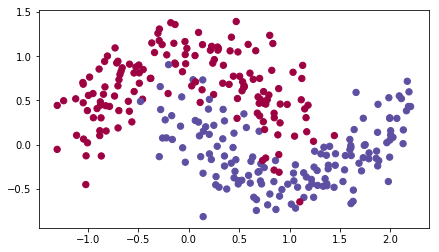

In [16]:
train_X, train_Y = load_dataset()

我们已经实现了一个3层神经网络，用它来测试三个优化算法算法： 
- Mini-batch **Gradient Descent**: 调用:
    - `update_parameters_with_gd()`
- Mini-batch **Momentum**: 调用:
    - `initialize_velocity()` 和 `update_parameters_with_momentum()`
- Mini-batch **Adam**: 调用:
    - `initialize_adam()` and `update_parameters_with_adam()`

In [17]:
def model(X, Y, layers_dims, optimizer, learning_rate = 0.0007, mini_batch_size = 64, beta = 0.9,
          beta1 = 0.9, beta2 = 0.999,  epsilon = 1e-8, num_epochs = 10000, print_cost = True):
    """
    3-layer neural network model which can be run in different optimizer modes.
    
    Arguments:
    X -- input data, of shape (2, number of examples)
    Y -- true "label" vector (1 for blue dot / 0 for red dot), of shape (1, number of examples)
    layers_dims -- python list, containing the size of each layer
    learning_rate -- the learning rate, scalar.
    mini_batch_size -- the size of a mini batch
    beta -- Momentum hyperparameter
    beta1 -- Exponential decay hyperparameter for the past gradients estimates 
    beta2 -- Exponential decay hyperparameter for the past squared gradients estimates 
    epsilon -- hyperparameter preventing division by zero in Adam updates
    num_epochs -- number of epochs
    print_cost -- True to print the cost every 1000 epochs

    Returns:
    parameters -- python dictionary containing your updated parameters 
    """

    L = len(layers_dims)             # number of layers in the neural networks
    costs = []                       # to keep track of the cost
    t = 0                            # initializing the counter required for Adam update
    seed = 10                        # For grading purposes, so that your "random" minibatches are the same as ours
    
    # Initialize parameters
    parameters = initialize_parameters(layers_dims)

    # Initialize the optimizer
    if optimizer == "gd":
        pass # no initialization required for gradient descent
    elif optimizer == "momentum":
        v = initialize_velocity(parameters)
    elif optimizer == "adam":
        v, s = initialize_adam(parameters)
    
    # Optimization loop
    for i in range(num_epochs):
        
        # Define the random minibatches. We increment the seed to reshuffle differently the dataset after each epoch
        seed = seed + 1
        minibatches = random_mini_batches(X, Y, mini_batch_size, seed)

        for minibatch in minibatches:

            # Select a minibatch
            (minibatch_X, minibatch_Y) = minibatch

            # Forward propagation
            a3, caches = forward_propagation(minibatch_X, parameters)

            # Compute cost
            cost = compute_cost(a3, minibatch_Y)

            # Backward propagation
            grads = backward_propagation(minibatch_X, minibatch_Y, caches)

            # Update parameters
            if optimizer == "gd":
                parameters = update_parameters_with_gd(parameters, grads, learning_rate)
            elif optimizer == "momentum":
                parameters, v = update_parameters_with_momentum(parameters, grads, v, beta, learning_rate)
            elif optimizer == "adam":
                t = t + 1 # Adam counter
                parameters, v, s = update_parameters_with_adam(parameters, grads, v, s,
                                                               t, learning_rate, beta1, beta2,  epsilon)
        
        # Print the cost every 1000 epoch
        if print_cost and i % 1000 == 0:
            print ("Cost after epoch %i: %f" %(i, cost))
        if print_cost and i % 100 == 0:
            costs.append(cost)
                
    # plot the cost
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('epochs (per 100)')
    plt.title("Learning rate = " + str(learning_rate))
    plt.show()

    return parameters

分别运行这三个不同的优化算法。

### 5.1 - Mini-batch Gradient descent

测试mini-batch gradient descent.

Cost after epoch 0: 0.690736
Cost after epoch 1000: 0.685273
Cost after epoch 2000: 0.647072
Cost after epoch 3000: 0.619525
Cost after epoch 4000: 0.576584
Cost after epoch 5000: 0.607243
Cost after epoch 6000: 0.529403
Cost after epoch 7000: 0.460768
Cost after epoch 8000: 0.465586
Cost after epoch 9000: 0.464518


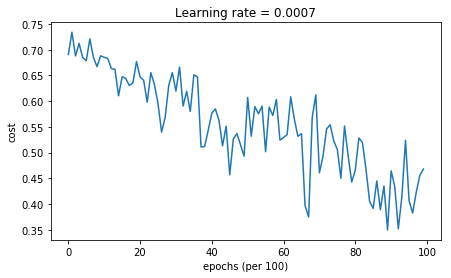

Accuracy: 0.796666666667


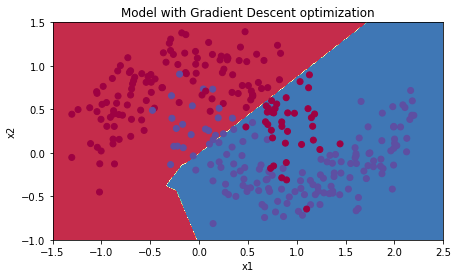

In [18]:
# train 3-layer model
layers_dims = [train_X.shape[0], 5, 2, 1]
parameters = model(train_X, train_Y, layers_dims, optimizer = "gd")

# Predict
predictions = predict(train_X, train_Y, parameters)

# Plot decision boundary
plt.title("Model with Gradient Descent optimization")
axes = plt.gca()
axes.set_xlim([-1.5,2.5])
axes.set_ylim([-1,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

### 5.2 - Mini-batch gradient descent with momentum

现在来看看加入momentum优化的效果。由于这个例子较简单，所以效果不是非常明显，再更复杂的例子中会有更好的表现。

Cost after epoch 0: 0.690741
Cost after epoch 1000: 0.685341
Cost after epoch 2000: 0.647145
Cost after epoch 3000: 0.619594
Cost after epoch 4000: 0.576665
Cost after epoch 5000: 0.607324
Cost after epoch 6000: 0.529476
Cost after epoch 7000: 0.460936
Cost after epoch 8000: 0.465780
Cost after epoch 9000: 0.464740


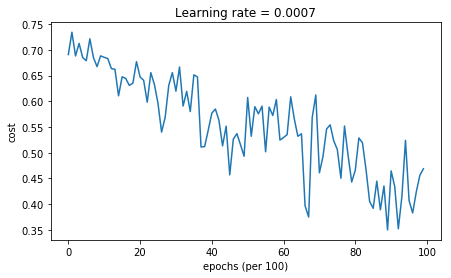

Accuracy: 0.796666666667


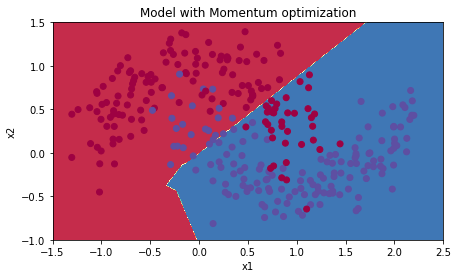

In [19]:
# train 3-layer model
layers_dims = [train_X.shape[0], 5, 2, 1]
parameters = model(train_X, train_Y, layers_dims, beta = 0.9, optimizer = "momentum")

# Predict
predictions = predict(train_X, train_Y, parameters)

# Plot decision boundary
plt.title("Model with Momentum optimization")
axes = plt.gca()
axes.set_xlim([-1.5,2.5])
axes.set_ylim([-1,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

### 5.3 - Mini-batch with Adam mode

看看使用Adam会得到怎样的效果。

Cost after epoch 0: 0.690552
Cost after epoch 1000: 0.185501
Cost after epoch 2000: 0.150830
Cost after epoch 3000: 0.074454
Cost after epoch 4000: 0.125959
Cost after epoch 5000: 0.104344
Cost after epoch 6000: 0.100676
Cost after epoch 7000: 0.031652
Cost after epoch 8000: 0.111973
Cost after epoch 9000: 0.197940


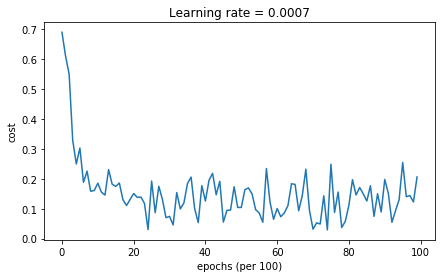

Accuracy: 0.94


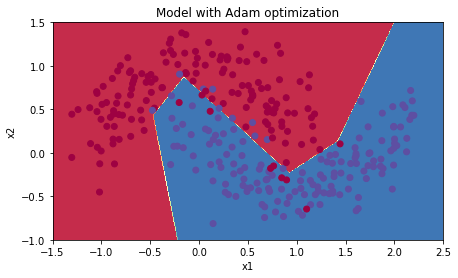

In [20]:
# train 3-layer model
layers_dims = [train_X.shape[0], 5, 2, 1]
parameters = model(train_X, train_Y, layers_dims, optimizer = "adam")

# Predict
predictions = predict(train_X, train_Y, parameters)

# Plot decision boundary
plt.title("Model with Adam optimization")
axes = plt.gca()
axes.set_xlim([-1.5,2.5])
axes.set_ylim([-1,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

### 5.4 - 总结

<table> 
    <tr>
        <td>
        **optimization method**
        </td>
        <td>
        **accuracy**
        </td>
        <td>
        **cost shape**
        </td>

    </tr>
        <td>
        Gradient descent
        </td>
        <td>
        79.7%
        </td>
        <td>
        oscillations
        </td>
    <tr>
        <td>
        Momentum
        </td>
        <td>
        79.7%
        </td>
        <td>
        oscillations
        </td>
    </tr>
    <tr>
        <td>
        Adam
        </td>
        <td>
        94%
        </td>
        <td>
        smoother
        </td>
    </tr>
</table> 

Momentum 通常是有用的，但是由于学习率太小而且例子叫简单，所以对于结果的提升不明显。 

Adam则表现的比mini-batch gradient descent 和 Momentum要好得多。如果你训练的够久，这三个模型都会得到不错的结果，但是我们已经看到Adam对模型带来的优化效果了。

Adam的一些优点:

- 相对小的内存需求 (虽然比 gradient descent 和 gradient descent with momentum要高) 
- 稍微调整就会有很好的效果 (除了 $\alpha$)

**参考**:

- Adam paper: https://arxiv.org/pdf/1412.6980.pdf